In [4]:
import pymc3 as pm
import arviz as az

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./data/cleaned.csv')

In [7]:
df.drop(columns=['log prize', 'inv prize'], inplace=True)

In [27]:
df

,rank,name,country,prize
0,1,Michael van Gerwen,Netherlands,8321167
1,2,Phil Taylor,England,7630816
2,3,Gary Anderson,Scotland,4118772
3,4,Raymond van Barneveld,Netherlands,3510128
4,5,Peter Wright,Scotland,3470888
...,...,...,...,...
495,496,Ben Robb,New Zealand,15339
496,497,Shane O Connor,Ireland,15325
497,498,Karin Krappen,Netherlands,15279
498,499,Ricky Williams,England,15276


In [77]:
pareto = pm.Model()

with pareto:
    m = pm.Uniform('m', lower = 15300, upper = 15350)
    alpha = pm.Uniform('alpha', lower = .0001, upper = .5)
    
    y = pm.Pareto('y', m=m, alpha=alpha, observed=df['prize'].to_numpy())

In [78]:
with pareto:
    trace = pm.sample(10000)

SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'m_interval__': array(0.), 'alpha_interval__': array(0.)}

Initial evaluation results:
m_interval__       -1.39
alpha_interval__   -1.39
y                   -inf
Name: Log-probability of test_point, dtype: float64

In [ ]:
az.plot_trace(trace)

In [ ]:
az.plot_posterior(trace)

In [79]:
exp = pm.Model()

with exp:
    λ = pm.Uniform('λ', lower = .0001, upper = .5)
    
    y = pm.Exponential('y', lam=λ, observed=df['prize'].to_numpy())

In [80]:
with exp:
    trace = pm.sample(1000)

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/pymc3/sampling.py:469: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [λ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 12 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8935854258212429, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'λ'}>,
        <AxesSubplot:title={'center':'λ'}>]], dtype=object)

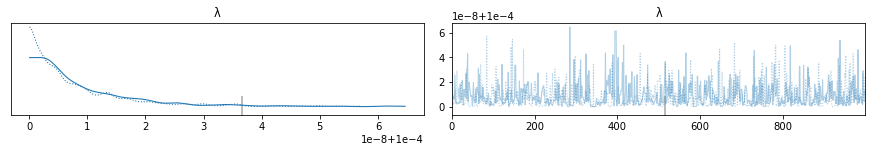

In [81]:
az.plot_trace(trace)

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


<AxesSubplot:title={'center':'λ'}>

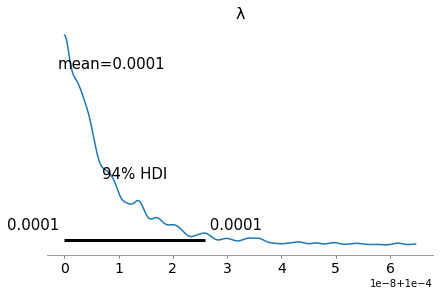

In [82]:
az.plot_posterior(trace)